# Analysis of correlation between B statistic bins and Neanderthal admixture

In [1]:
library(GenomicRanges)
library(rtracklayer)
library(ggplot2)
library(magrittr)
library(stringr)
library(dplyr)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Loading required package: S4Vectors
Loading required package: stats4
Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’
Loading required

In [2]:
options(repr.plot.width=6, repr.plot.height=4)
options(jupyter.plot_mimetypes = setdiff(getOption('jupyter.plot_mimetypes'), 'image/svg+xml'))

In [3]:
# Load a BED file with allele states in an individual. Annotate each
# such site with B statistic value and a binary value describing if
# this individual carries an archaic-like SNP.
load_snps <- function(bed_filename, bstat_sites) {
    # first load the informative states in a given individual
    test_bed <- import.bed(bed_filename, extraCols=c(afr="character", arch="character", test="character"))
    
    # take an overlap of these sites and sites for which we have
    # a B statistic value available
    hits <- findOverlaps(test_bed, bstat_sites)
    
    # take only those sites for which we have a B statistic value
    test_bed <- test_bed[queryHits(hits)]
    
    # assign to them the corresponding B statistic values
    test_bed$bstat <- bstat_sites[subjectHits(hits)]$bstat
    test_bed$bin <- factor(bstat_sites[subjectHits(hits)]$bin)
    
    # which sites carry an archaic-like snp?
    test_bed$archaic <- as.integer(test_bed$arch == test_bed$test)
    
    test_bed[, c("archaic", "bstat", "bin")]
}


# Calculate the proportion of sharing of derived allele in a given bin.
admixture_prop <- function(sites, bin_i) {
    bin_sites <- sites[which(sites$bin == bin_i)]
    
    mean(bin_sites$archaic) * 100
}


# For a given vector of B statistic values, return a vector of bins based
# on the specified number of bins.
get_bin_values <- function(bstat_values, n_bins) {
    qs <- quantile(bstat_values, prob=seq(0, 1, length.out=n_bins + 1))
    
    findInterval(bstat_values, vec=qs, rightmost.closed=TRUE)
}


# Extract the sample name from the given path to the BED file.
get_sample_name <- function(bed_file_path) {
    basename(bed_file_path) %>%
        str_replace("\\.bed", "") %>%
        str_replace("_deam_L35MQ37_majority_call", "") %>%
        str_replace_all("_", " ")
}


# Get a p-value from the lm model.
get_lm_pvalue <- function(lm_result) {
    fs <- summary(reg)$fstatistic
    as.numeric(pf(fs[1], fs[2], fs[3], lower.tail=FALSE))
}

In [4]:
# load the SNP B statistic anotation BED file
bstat_sites <- import.bed("/mnt/scratch/mp/EMH/Bstat/martins_snp_bstat_values.bed", extraCols=c(bstat="integer"))

# Distribution of B statistic values for all SNPs on the array

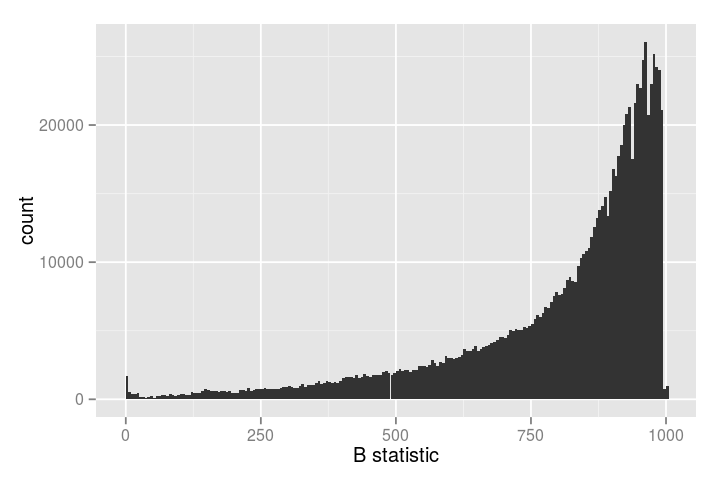

In [5]:
qplot(bstat_sites$bstat, binwidth=5, xlab="B statistic")

<br><br><br><br><br><br><br><br><br><br>
# Correlation analysis &mdash; 50 bins

In [6]:
results_df <- c()

In [7]:
n_bins <- 25

## Assign SNPs into a specified number of bins

In [8]:
# assign each SNP into a bin based on its B statistic value
bstat_sites$bin <- get_bin_values(bstat_sites$bstat, n_bins)

## Distribution of number of SNPs in each bin of B statistic

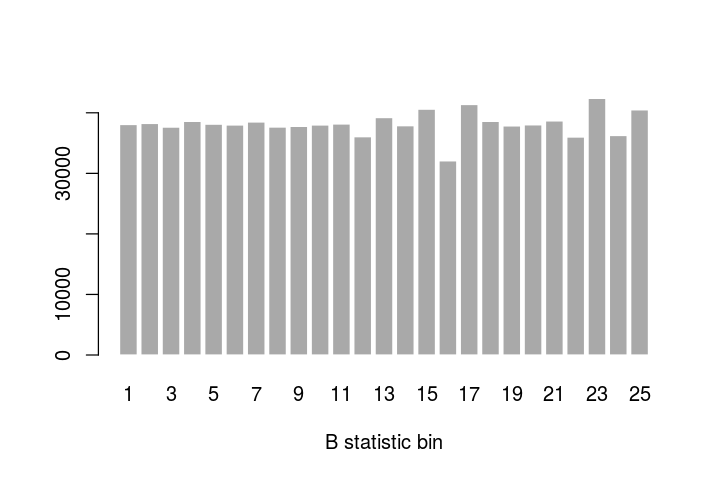

In [9]:
barplot(table(bstat_sites$bin), xlab="B statistic bin", col="darkgrey", border="white")

<br><br><br><br><br>
# Correlation analysis in high-coverage samples &mdash; positions from the array

In [10]:
setwd("/mnt/scratch/mateja/Early_modern_humans/nuclear_captures/Archaic_admixture_final/Altai_homozygous_and_YRI_at_high_frequency/highcov")

./Australian.bed 
number of sites: 476538 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37509 -0.18639 -0.08667  0.14086  0.75498 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.71814    0.11729  14.648 3.76e-13 ***
bin_indices  0.02608    0.00789   3.305  0.00309 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2845 on 23 degrees of freedom
Multiple R-squared:  0.322,	Adjusted R-squared:  0.2925 
F-statistic: 10.92 on 1 and 23 DF,  p-value: 0.003094


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 215, p-value = 0.002019
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4333333 



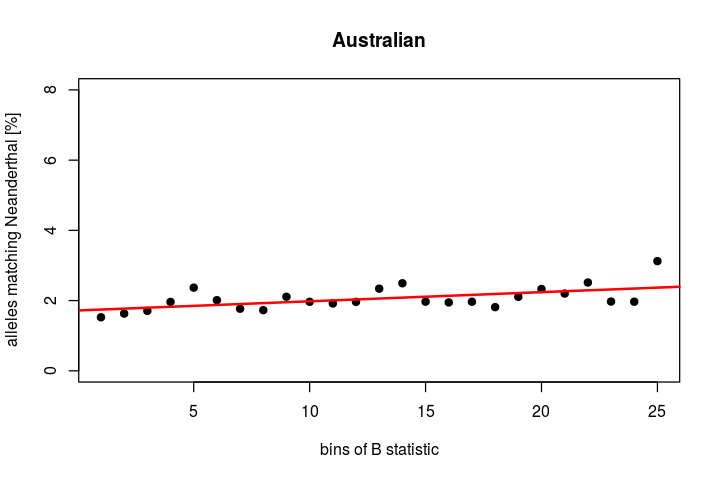

./Dinka.bed 
number of sites: 476184 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07901 -0.03623 -0.00389  0.02447  0.16371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.125850   0.023872   5.272 2.38e-05 ***
bin_indices 0.007541   0.001606   4.696 9.92e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0579 on 23 degrees of freedom
Multiple R-squared:  0.4895,	Adjusted R-squared:  0.4673 
F-statistic: 22.06 on 1 and 23 DF,  p-value: 9.923e-05


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 230, p-value = 0.0001016
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5333333 



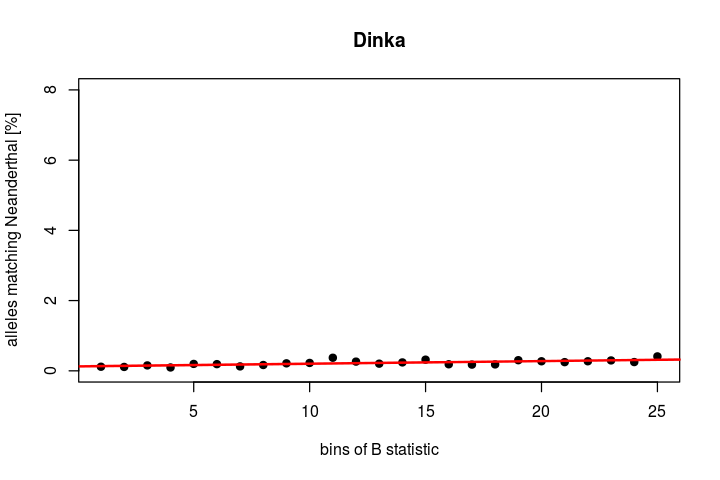

./French.bed 
number of sites: 476387 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44167 -0.14292  0.03008  0.15722  0.37638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.036132   0.093702  11.058 1.11e-10 ***
bin_indices 0.039541   0.006303   6.273 2.12e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2273 on 23 degrees of freedom
Multiple R-squared:  0.6311,	Adjusted R-squared:  0.6151 
F-statistic: 39.35 on 1 and 23 DF,  p-value: 2.116e-06


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 242, p-value = 4.763e-06
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6133333 



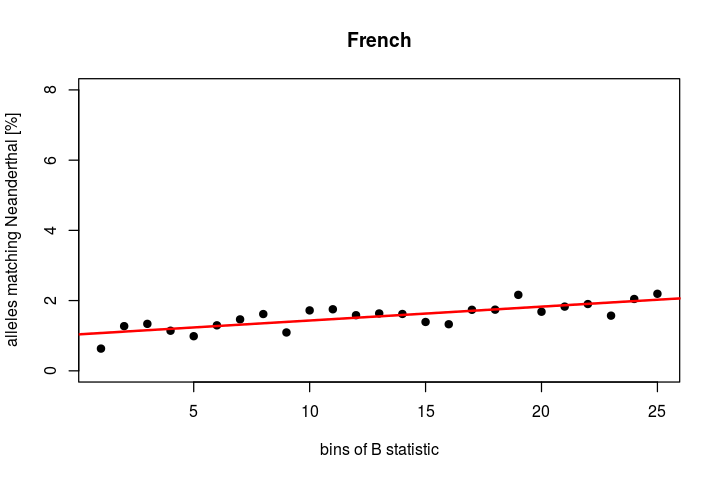

./Han.bed 
number of sites: 476396 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44481 -0.14021 -0.03028  0.15353  0.44227 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.348921   0.105438  12.793 6.09e-12 ***
bin_indices 0.045367   0.007093   6.396 1.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2557 on 23 degrees of freedom
Multiple R-squared:  0.6401,	Adjusted R-squared:  0.6245 
F-statistic: 40.91 on 1 and 23 DF,  p-value: 1.583e-06


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 243, p-value = 3.571e-06
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.62 



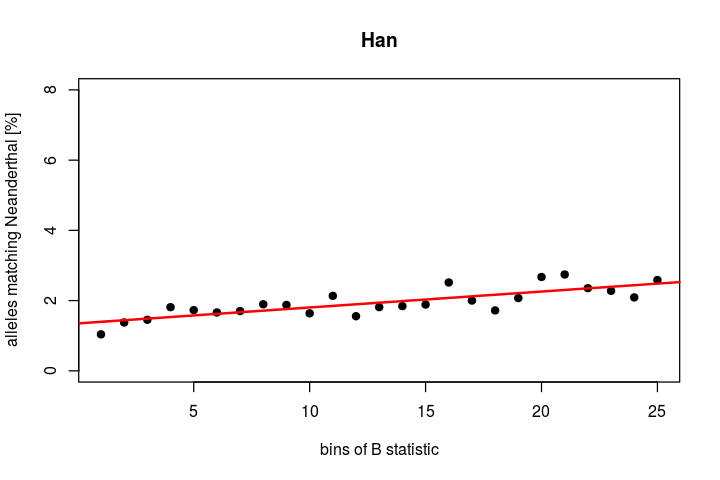

./Karitiana.bed 
number of sites: 476308 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39865 -0.17800 -0.04311  0.14294  0.50459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.552453   0.100969  15.376 1.36e-13 ***
bin_indices 0.026580   0.006792   3.914 0.000697 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2449 on 23 degrees of freedom
Multiple R-squared:  0.3997,	Adjusted R-squared:  0.3736 
F-statistic: 15.32 on 1 and 23 DF,  p-value: 0.0006972


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 222, p-value = 0.0005531
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.48 



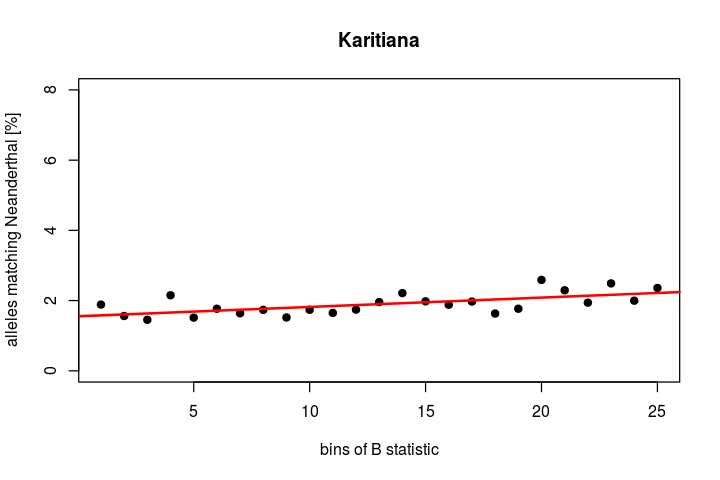

./Mbuti.bed 
number of sites: 476488 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.118442 -0.097496  0.004575  0.048841  0.182562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.313691   0.037871   8.283 2.35e-08 ***
bin_indices 0.018489   0.002547   7.258 2.19e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09185 on 23 degrees of freedom
Multiple R-squared:  0.6961,	Adjusted R-squared:  0.6829 
F-statistic: 52.67 on 1 and 23 DF,  p-value: 2.186e-07


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 254, p-value = 9.964e-08
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6933333 



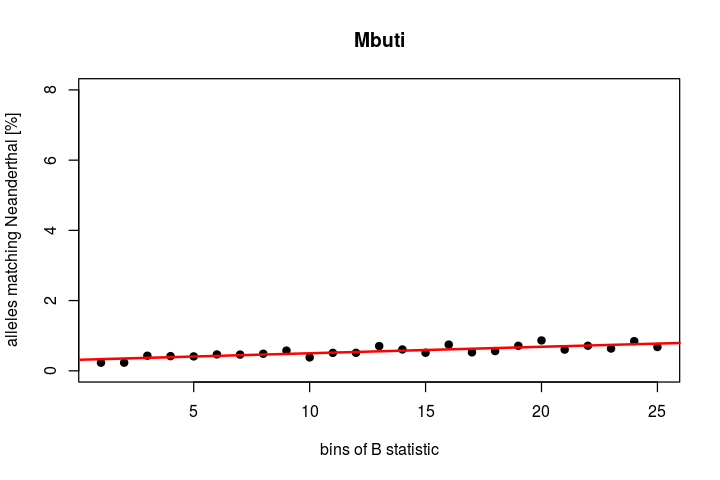

./Papuan.bed 
number of sites: 476372 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48267 -0.19724 -0.08423  0.05648  1.38467 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.84875    0.17248  10.718 2.03e-10 ***
bin_indices  0.02034    0.01160   1.753   0.0929 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4183 on 23 degrees of freedom
Multiple R-squared:  0.1179,	Adjusted R-squared:  0.07954 
F-statistic: 3.074 on 1 and 23 DF,  p-value: 0.09288


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 184, p-value = 0.1183
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2266667 



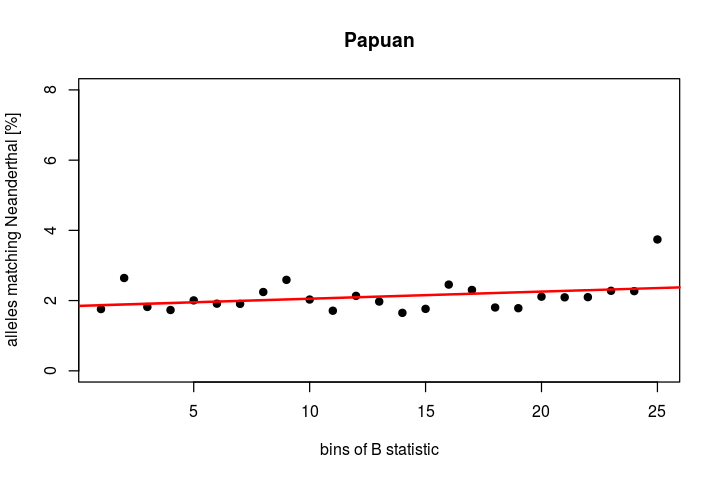

./San.bed 
number of sites: 476489 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37839 -0.06794  0.00531  0.11689  0.21162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.708947   0.061766  11.478 5.34e-11 ***
bin_indices 0.014644   0.004155   3.525  0.00182 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1498 on 23 degrees of freedom
Multiple R-squared:  0.3507,	Adjusted R-squared:  0.3225 
F-statistic: 12.42 on 1 and 23 DF,  p-value: 0.001816


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 221, p-value = 0.0006723
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4733333 



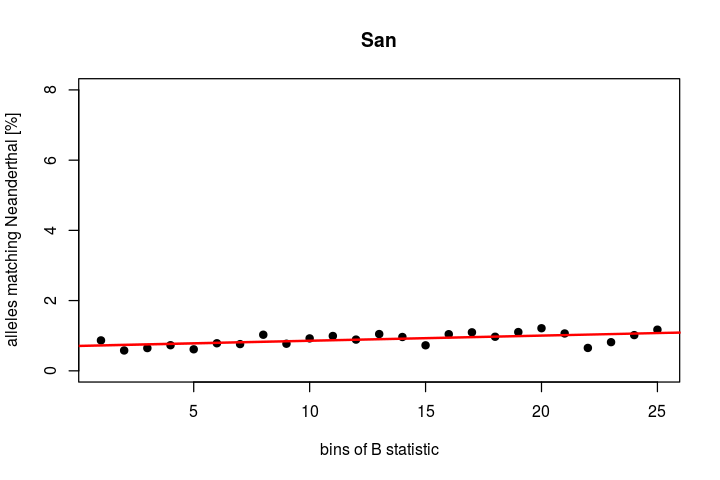

./Sardinian.bed 
number of sites: 476438 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45443 -0.19032 -0.00151  0.12320  0.50880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.087099   0.106156   10.24 4.87e-10 ***
bin_indices 0.039631   0.007141    5.55 1.21e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2575 on 23 degrees of freedom
Multiple R-squared:  0.5725,	Adjusted R-squared:  0.5539 
F-statistic:  30.8 on 1 and 23 DF,  p-value: 1.205e-05


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 232, p-value = 6.387e-05
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5466667 



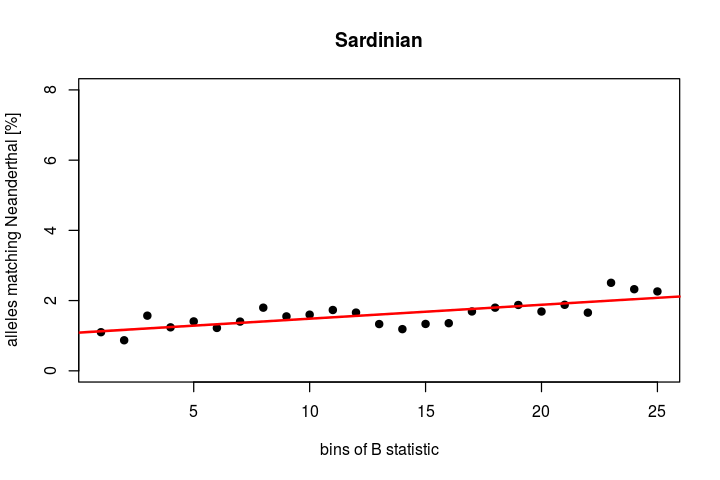

./Ust-Ishim.bed 
number of sites: 476687 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6575 -0.2495 -0.1313  0.2561  0.7491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.217686   0.157347  14.094 8.37e-13 ***
bin_indices 0.002245   0.010584   0.212    0.834    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3816 on 23 degrees of freedom
Multiple R-squared:  0.001951,	Adjusted R-squared:  -0.04144 
F-statistic: 0.04497 on 1 and 23 DF,  p-value: 0.8339


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 146, p-value = 0.8715
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.02666667 



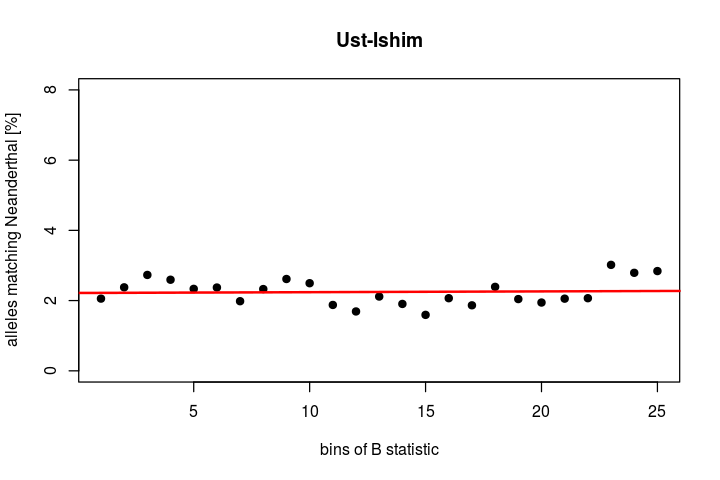

./Yoruba.bed 
number of sites: 476467 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10120 -0.03328 -0.00129  0.03525  0.13787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.124609   0.023944   5.204 2.82e-05 ***
bin_indices 0.005022   0.001611   3.118  0.00483 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05807 on 23 degrees of freedom
Multiple R-squared:  0.2971,	Adjusted R-squared:  0.2666 
F-statistic: 9.723 on 1 and 23 DF,  p-value: 0.004834


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 213, p-value = 0.002839
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.42 



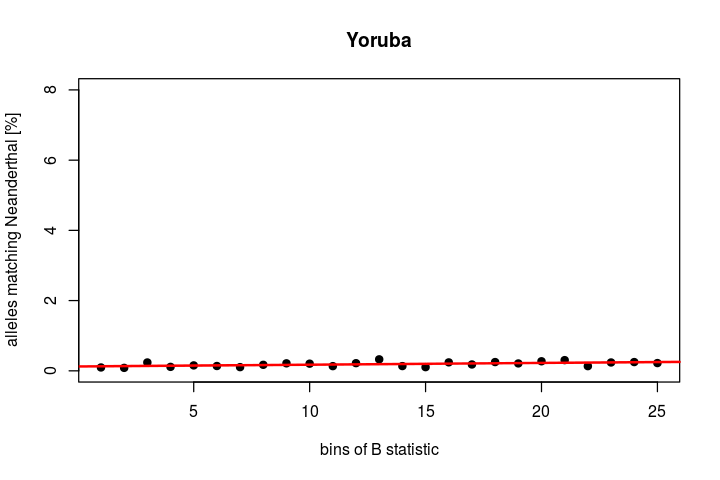

In [11]:
bed_files <- list.files(".", pattern="*.bed$", full.names=TRUE)

par(cex=0.8)

for (bed_file in bed_files) {
    sample_name <- get_sample_name(bed_file)
    
    # load positions of SNPs and their assigned B statistic values and bins
    info_sites <- load_snps(bed_file, bstat_sites)
    info_sites_data <- as.data.frame(mcols(info_sites))

    # calculate the proportion of sharing of alleles with archaics
    bin_indices <- 1 : n_bins
    prop_values <- sapply(bin_indices, function(bin_i) { admixture_prop(info_sites, bin_i) })

    # perform linear regression and plot the data
    reg <- lm(prop_values ~ bin_indices)
    plot(bin_indices, prop_values, ylim=c(0, 8), main=sample_name, pch=19,
         xlab="bins of B statistic", ylab="alleles matching Neanderthal [%]")
    abline(reg, col="red", lwd=2)
    
    # run the Kendall's correlation
    cor_test <- cor.test(prop_values, bin_indices, method="kendall")
    
    # print out the summary statistics
    cat(bed_file, "\n==================================================\n")
    cat("number of sites:", length(info_sites), "\n")
        
    print(summary(reg))
    cat("\ncor.test for bins:\n")
    print(cor_test)
    
    # assign the values to the final dataframe
    results_df <- rbind(results_df, data.frame(sample=sample_name,
                                               n_sites=length(info_sites),
                                               lm_r2=summary(reg)$r.squared,
                                               lm_f=summary(reg)$fstatistic["value"],
                                               lm_p=get_lm_pvalue(reg),
                                               cor_tau=cor_test$estimate,
                                               cor_p=cor_test$p.value,
                                               row.names=NULL))
}

<br><br><br><br><br>
# EMH

In [12]:
setwd("/mnt/scratch/mateja/Early_modern_humans/nuclear_captures/Archaic_admixture_final/Test_high_cov_with_Altai_only_positions/Majority_call_low_coverage_deam_only/")

./Afontova_Gora_deam_L35MQ37_majority_call.bed 
number of sites: 59417 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71508 -0.17035 -0.02256  0.20736  0.53076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.15689    0.11566  18.649 2.21e-15 ***
bin_indices -0.01253    0.00778  -1.611    0.121    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2805 on 23 degrees of freedom
Multiple R-squared:  0.1014,	Adjusted R-squared:  0.06229 
F-statistic: 2.594 on 1 and 23 DF,  p-value: 0.1209


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 121, p-value = 0.1851
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1933333 



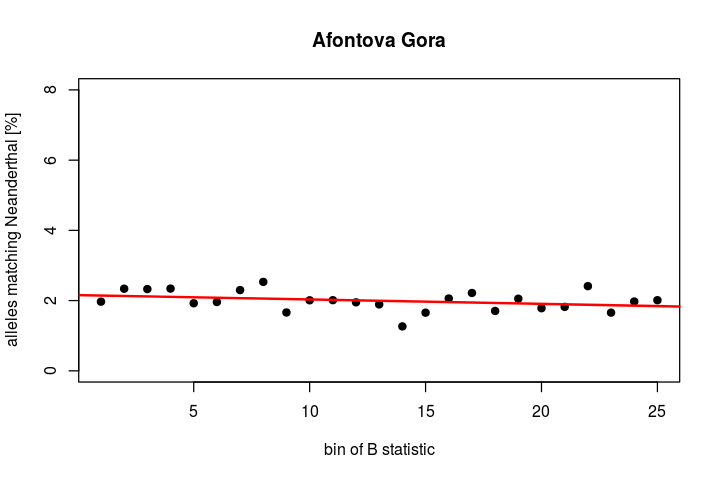

./Dolni_Vestonice_13_deam_L35MQ37_majority_call.bed 
number of sites: 22727 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35090 -0.41327 -0.00428  0.36938  1.01080 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.348790   0.261738   8.974 5.66e-09 ***
bin_indices -0.003071   0.017606  -0.174    0.863    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6348 on 23 degrees of freedom
Multiple R-squared:  0.001321,	Adjusted R-squared:  -0.0421 
F-statistic: 0.03043 on 1 and 23 DF,  p-value: 0.863


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 148, p-value = 0.9447
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.01333333 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

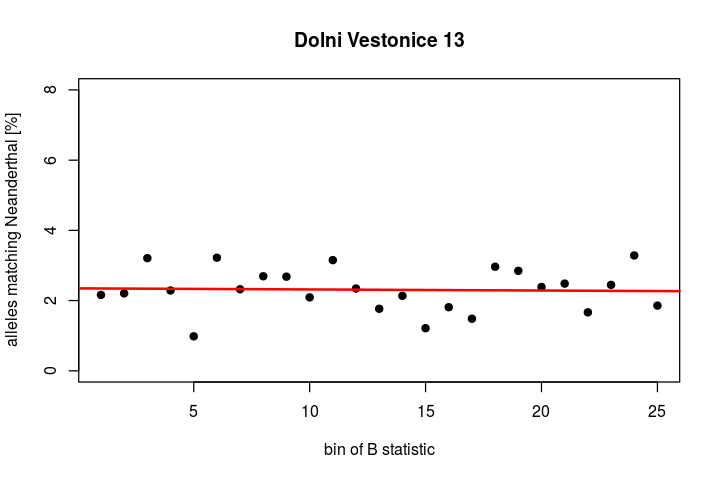

./Dolni_Vestonice_15_deam_L35MQ37_majority_call.bed 
number of sites: 3629 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0921 -0.5027 -0.1442  0.3362  1.8062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.03715    0.32007   6.365 1.71e-06 ***
bin_indices -0.02390    0.02153  -1.110    0.278    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7763 on 23 degrees of freedom
Multiple R-squared:  0.05084,	Adjusted R-squared:  0.009576 
F-statistic: 1.232 on 1 and 23 DF,  p-value: 0.2785


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = -1.1455, p-value = 0.252
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1641562 



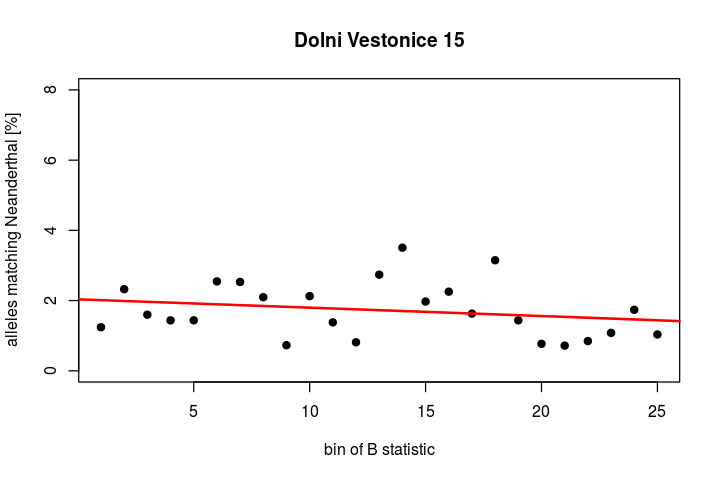

./Dolni_Vestonice_16_deam_L35MQ37_majority_call.bed 
number of sites: 60614 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66143 -0.13517 -0.06589  0.21717  0.61502 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.131945   0.139726  15.258  1.6e-13 ***
bin_indices -0.002604   0.009399  -0.277    0.784    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3389 on 23 degrees of freedom
Multiple R-squared:  0.003327,	Adjusted R-squared:  -0.04001 
F-statistic: 0.07677 on 1 and 23 DF,  p-value: 0.7842


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 132, p-value = 0.4176
alternative hypothesis: true tau is not equal to 0
sample estimates:
  tau 
-0.12 



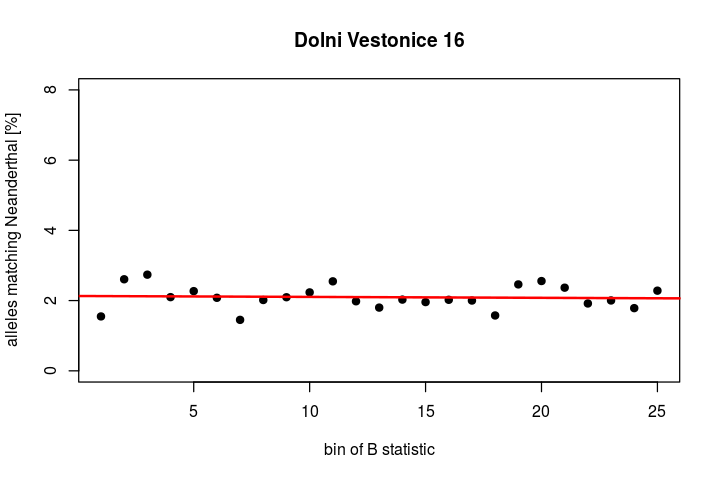

./Dolni_Vestonice_43_deam_L35MQ37_majority_call.bed 
number of sites: 23183 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93269 -0.40155 -0.00323  0.24679  1.00723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87921    0.22336   8.413 1.79e-08 ***
bin_indices  0.01399    0.01502   0.931    0.361    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5417 on 23 degrees of freedom
Multiple R-squared:  0.03635,	Adjusted R-squared:  -0.005549 
F-statistic: 0.8676 on 1 and 23 DF,  p-value: 0.3613


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 165, p-value = 0.5022
alternative hypothesis: true tau is not equal to 0
sample estimates:
tau 
0.1 



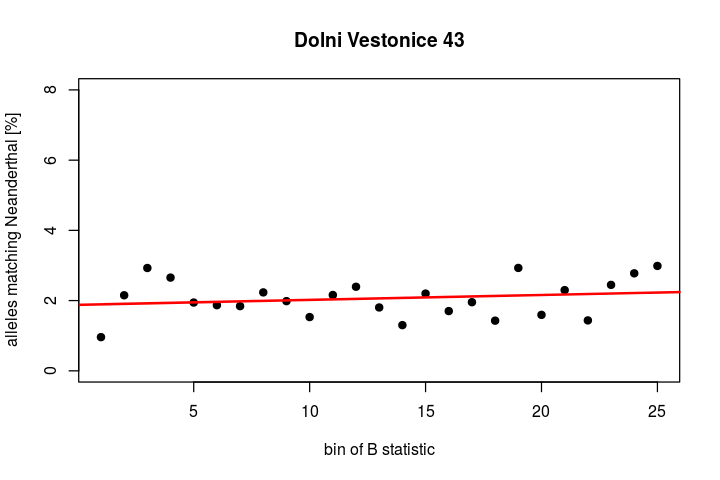

./El_Miron_deam_L35MQ37_majority_call.bed 
number of sites: 153759 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74324 -0.21878 -0.02067  0.36503  0.60887 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.72750    0.15653  11.036 1.15e-10 ***
bin_indices  0.03079    0.01053   2.924  0.00763 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3796 on 23 degrees of freedom
Multiple R-squared:  0.271,	Adjusted R-squared:  0.2393 
F-statistic:  8.55 on 1 and 23 DF,  p-value: 0.007634


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 193, p-value = 0.04631
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2866667 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

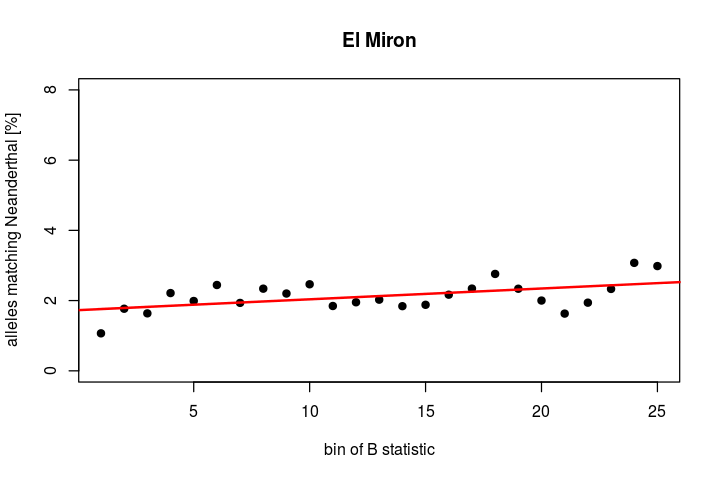

./Grotta_deam_L35MQ37_majority_call.bed 
number of sites: 1056 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9999 -1.9467  0.4874  0.9510  3.3550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.888798   0.816863   2.312   0.0301 *
bin_indices 0.004829   0.054948   0.088   0.9307  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.981 on 23 degrees of freedom
Multiple R-squared:  0.0003357,	Adjusted R-squared:  -0.04313 
F-statistic: 0.007724 on 1 and 23 DF,  p-value: 0.9307


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = 0, p-value = 1
alternative hypothesis: true tau is not equal to 0
sample estimates:
tau 
  0 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

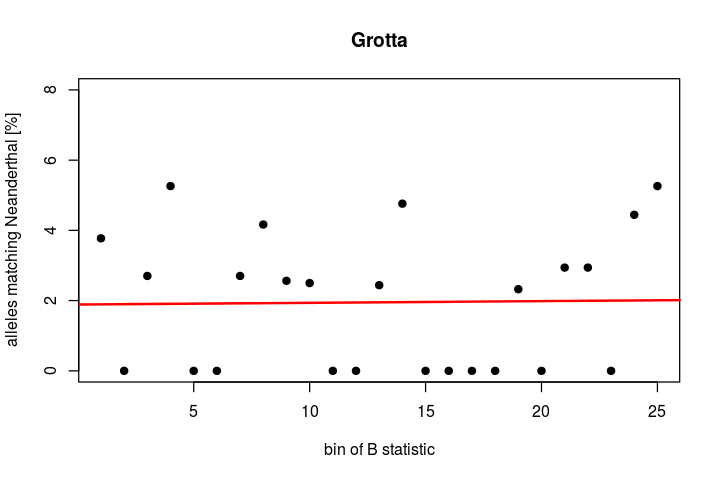

./Kostenki12_deam_L35MQ37_majority_call.bed 
number of sites: 1206 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8609 -1.6595  0.0896  0.4467  4.9172 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.42146    0.87497   1.625    0.118
bin_indices  0.01831    0.05886   0.311    0.759

Residual standard error: 2.122 on 23 degrees of freedom
Multiple R-squared:  0.00419,	Adjusted R-squared:  -0.03911 
F-statistic: 0.09678 on 1 and 23 DF,  p-value: 0.7585


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = 0.074543, p-value = 0.9406
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.01134704 



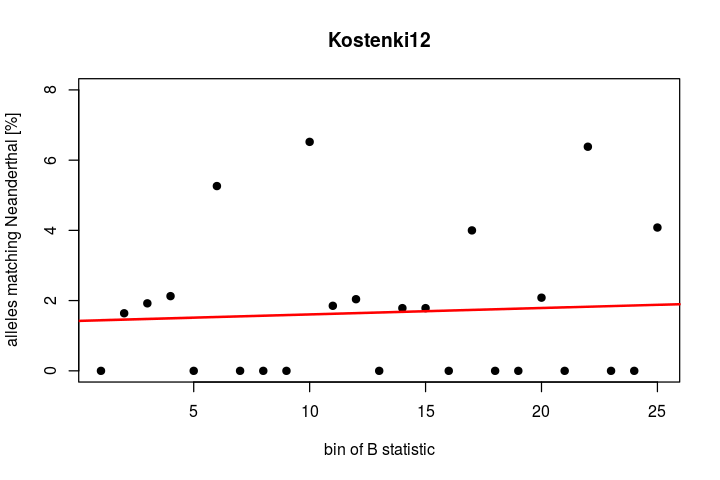

./Kostenki14_deam_L35MQ37_majority_call.bed 
number of sites: 166733 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51235 -0.29620 -0.06715  0.23356  0.57805 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.269354   0.140203  16.186  4.6e-14 ***
bin_indices -0.015230   0.009431  -1.615     0.12    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.34 on 23 degrees of freedom
Multiple R-squared:  0.1018,	Adjusted R-squared:  0.06279 
F-statistic: 2.608 on 1 and 23 DF,  p-value: 0.12


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 124, p-value = 0.2363
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1733333 



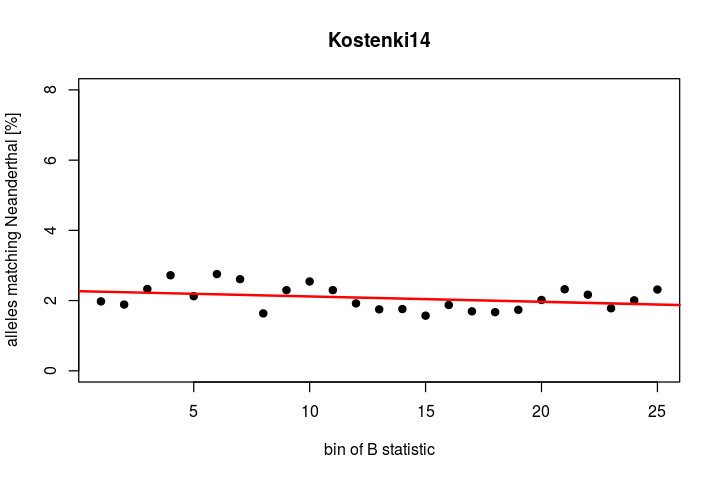

./Muierii_deam_L35MQ37_majority_call.bed 
number of sites: 13828 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9965 -0.5352  0.2084  0.3605  1.4257 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.16567    0.27149   7.977 4.51e-08 ***
bin_indices  0.01452    0.01826   0.795    0.435    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6585 on 23 degrees of freedom
Multiple R-squared:  0.02673,	Adjusted R-squared:  -0.01558 
F-statistic: 0.6318 on 1 and 23 DF,  p-value: 0.4348


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 169, p-value = 0.3914
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1266667 



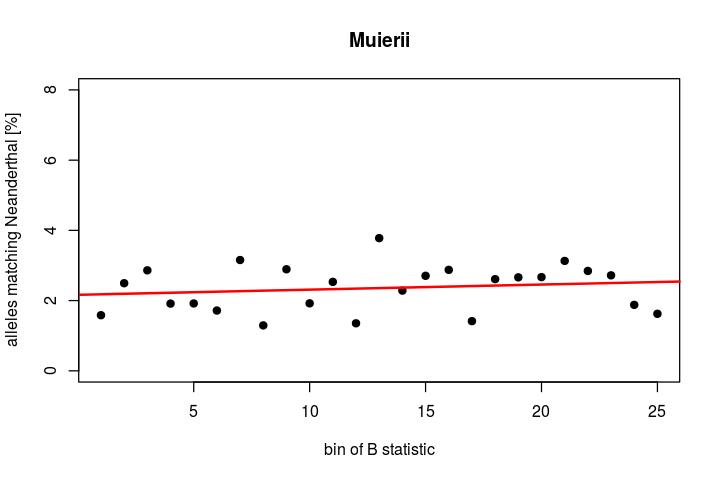

./Oase1_deam_L35MQ37_majority_call.bed 
number of sites: 37614 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65923 -0.19049  0.00596  0.35933  1.59926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.3496     0.2661  20.100 4.34e-16 ***
bin_indices   0.0147     0.0179   0.821     0.42    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6455 on 23 degrees of freedom
Multiple R-squared:  0.02847,	Adjusted R-squared:  -0.01377 
F-statistic: 0.674 on 1 and 23 DF,  p-value: 0.4201


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 164, p-value = 0.5322
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.09333333 



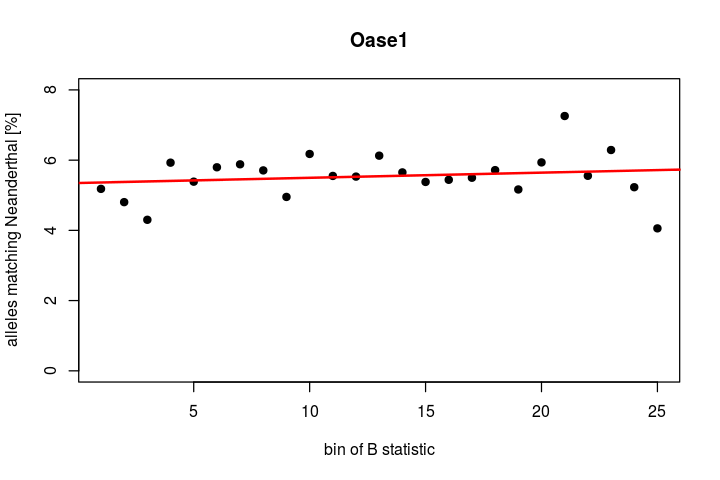

./Oase1_deam_nonUSER_L35MQ37_majority_call.bed 
number of sites: 37486 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63275 -0.35806  0.08131  0.27695  1.84315 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.11420    0.27843  18.368 3.07e-15 ***
bin_indices  0.01502    0.01873   0.802    0.431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6753 on 23 degrees of freedom
Multiple R-squared:  0.02719,	Adjusted R-squared:  -0.0151 
F-statistic: 0.643 on 1 and 23 DF,  p-value: 0.4308


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 164, p-value = 0.5322
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.09333333 



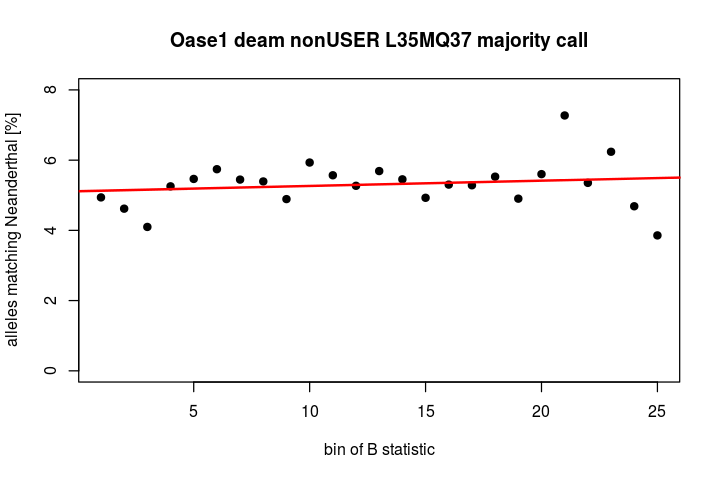

./Ostuni_1_deam_L35MQ37_majority_call.bed 
number of sites: 54537 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98040 -0.23350  0.02537  0.32230  0.74683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.68352    0.17398   9.676 1.42e-09 ***
bin_indices  0.02449    0.01170   2.093   0.0476 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.422 on 23 degrees of freedom
Multiple R-squared:  0.1599,	Adjusted R-squared:  0.1234 
F-statistic: 4.379 on 1 and 23 DF,  p-value: 0.04762


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 186, p-value = 0.09755
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.24 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

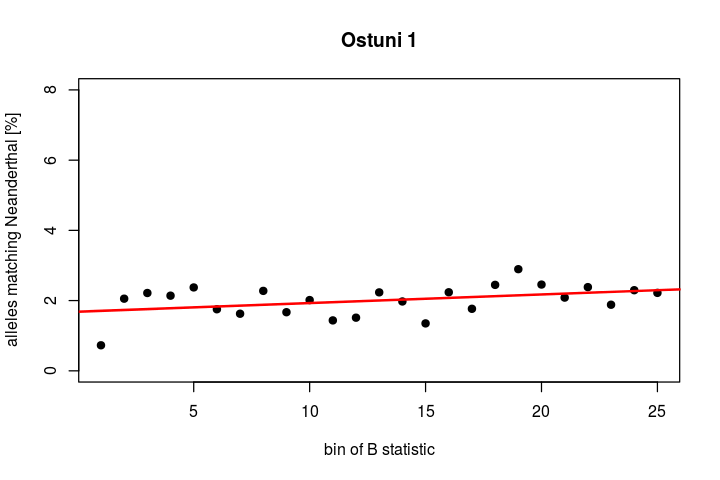

./Ostuni_2_deam_L35MQ37_majority_call.bed 
number of sites: 1629 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1395 -1.0615 -0.5862  1.0876  3.7926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.63025    0.66184   0.952    0.351
bin_indices  0.07187    0.04452   1.614    0.120

Residual standard error: 1.605 on 23 degrees of freedom
Multiple R-squared:  0.1018,	Adjusted R-squared:  0.06271 
F-statistic: 2.606 on 1 and 23 DF,  p-value: 0.1201


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = 1.5973, p-value = 0.1102
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2390928 



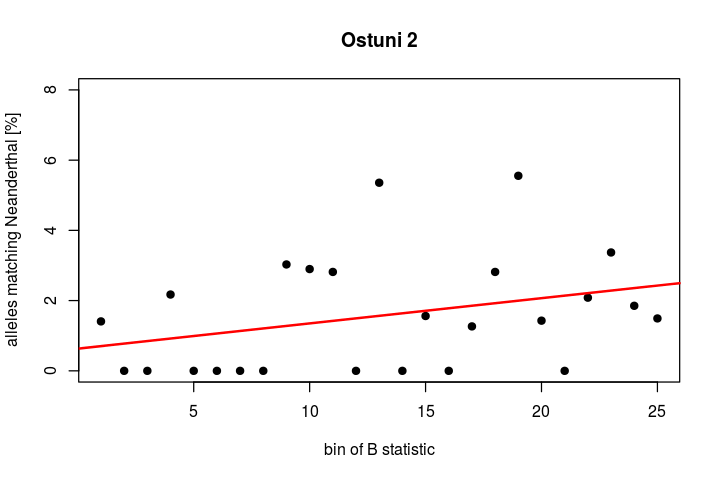

./Pavlov_1_deam_L35MQ37_majority_call.bed 
number of sites: 5652 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6885 -0.8116 -0.2719  0.6421  2.5374 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.119181   0.477351   4.439 0.000188 ***
bin_indices 0.001651   0.032110   0.051 0.959448    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.158 on 23 degrees of freedom
Multiple R-squared:  0.0001149,	Adjusted R-squared:  -0.04336 
F-statistic: 0.002642 on 1 and 23 DF,  p-value: 0.9594


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 157, p-value = 0.7638
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.04666667 



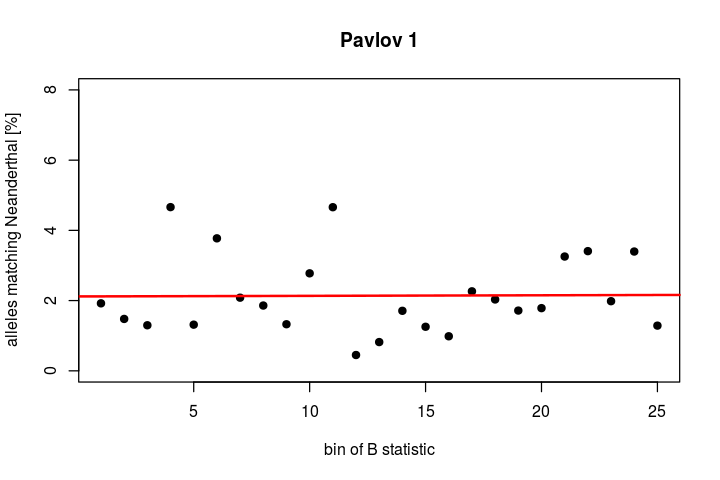

./Villabruna_deam_L35MQ37_majority_call.bed 
number of sites: 170045 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48810 -0.13625  0.00350  0.06632  0.71417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.592663   0.115943  13.737 1.42e-12 ***
bin_indices 0.025107   0.007799   3.219   0.0038 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2812 on 23 degrees of freedom
Multiple R-squared:  0.3106,	Adjusted R-squared:  0.2806 
F-statistic: 10.36 on 1 and 23 DF,  p-value: 0.0038


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 214, p-value = 0.002398
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4266667 



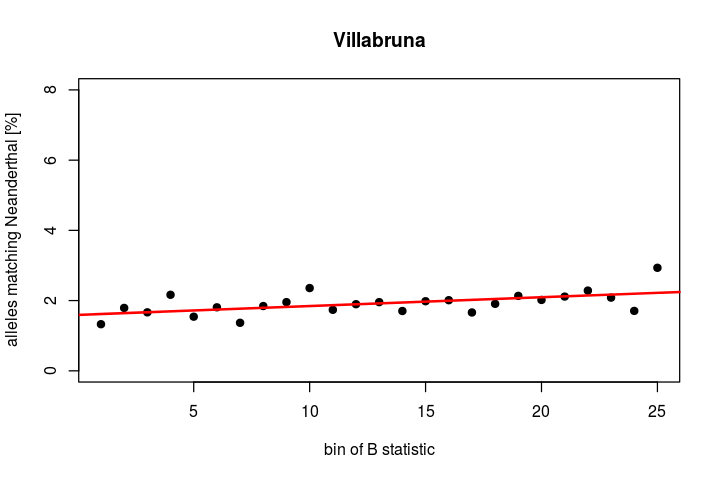

In [13]:
bed_files <- list.files(".", pattern="*.bed$", full.names=TRUE)

par(cex=0.8)

for (bed_file in bed_files) {
    sample_name <- get_sample_name(bed_file)
    
    # load positions of SNPs and their assigned B statistic values and bins
    info_sites <- load_snps(bed_file, bstat_sites)
    info_sites_data <- as.data.frame(mcols(info_sites))

    # if (length(info_sites) < n_sites_cutoff) next

    # calculate the proportion of sharing of alleles with archaics
    bin_indices <- 1 : n_bins
    prop_values <- sapply(bin_indices, function(bin_i) { admixture_prop(info_sites, bin_i) })

    # perform linear regression and plot the data
    reg <- lm(prop_values ~ bin_indices)
    plot(bin_indices, prop_values, ylim=c(0, 8), main=sample_name, pch=19,
         xlab="bin of B statistic", ylab="alleles matching Neanderthal [%]")
    abline(reg, col="red", lwd=2)
    
    # run the Kendall's correlation
    cor_test <- cor.test(prop_values, bin_indices, method="kendall")
    
    # print out the summary statistics
    cat(bed_file, "\n==================================================\n")
    cat("number of sites:", length(info_sites), "\n")
        
    print(summary(reg))
    cat("\ncor.test for bins:\n")
    print(cor_test)
    
    # assign the values to the final dataframe
    results_df <- rbind(results_df, data.frame(sample=sample_name,
                                               n_sites=length(info_sites),
                                               lm_r2=summary(reg)$r.squared,
                                               lm_f=summary(reg)$fstatistic["value"],
                                               lm_p=get_lm_pvalue(reg),
                                               cor_tau=cor_test$estimate,
                                               cor_p=cor_test$p.value,
                                               row.names=NULL))
}

In [14]:
results_df

,sample,n_sites,lm_r2,lm_f,lm_p,cor_tau,cor_p
1,Australian,476538,0.3219774,10.92218,0.003093714,0.4333333,0.002019008
2,Dinka,476184,0.4895155,22.05523,9.922805e-05,0.5333333,0.000101558
3,French,476387,0.6311429,39.35477,2.115939e-06,0.6133333,4.762624e-06
4,Han,476396,0.6401451,40.91465,1.582619e-06,0.62,3.571429e-06
5,Karitiana,476308,0.3997228,15.31563,0.0006971529,0.48,0.000553123
6,Mbuti,476488,0.6960671,52.67459,2.186111e-07,0.6933333,9.96364e-08
7,Papuan,476372,0.1178899,3.073842,0.09288122,0.2266667,0.1183434
8,San,476489,0.3506957,12.42253,0.001815953,0.4733333,0.0006723102
9,Sardinian,476438,0.5725003,30.8012,1.205168e-05,0.5466667,6.387417e-05
10,Ust-Ishim,476687,0.001951372,0.04496931,0.8339285,-0.02666667,0.8715144


In [15]:
options(scipen=10)
write.table(format(results_df, scientific=FALSE), "correlations.tsv", sep="\t", quote=FALSE)
system("mv correlations.tsv ~/ownCloud/notebooks/emh/correlations.tsv")
options(scipen=0)